In [1]:
from google.colab import files
uploaded = files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [3]:
import pandas as pd
import numpy as np
Start = pd.read_csv("50_Startups.csv")
Start.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
Start.tail(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [6]:
print(Start.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


In [14]:
Start.shape

(50, 5)

In [12]:
Start.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
Start.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
Start.corr()

<ipython-input-9-defe628b6096>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Start.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<ipython-input-10-ffeb1df94d6f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Start.corr(), annot= True)


<Axes: >

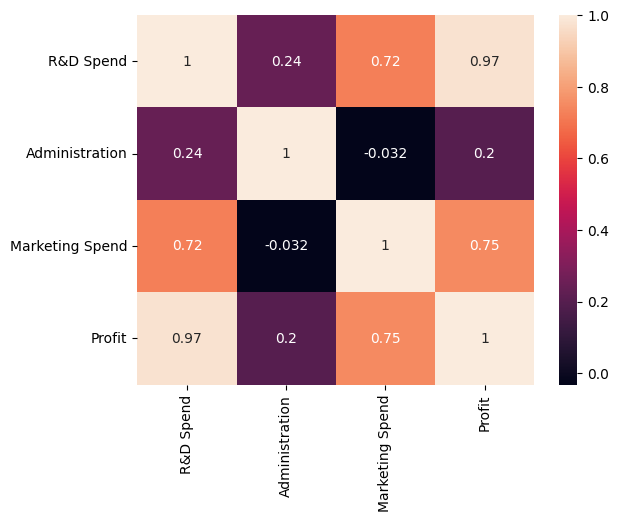

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(Start.corr(), annot= True)

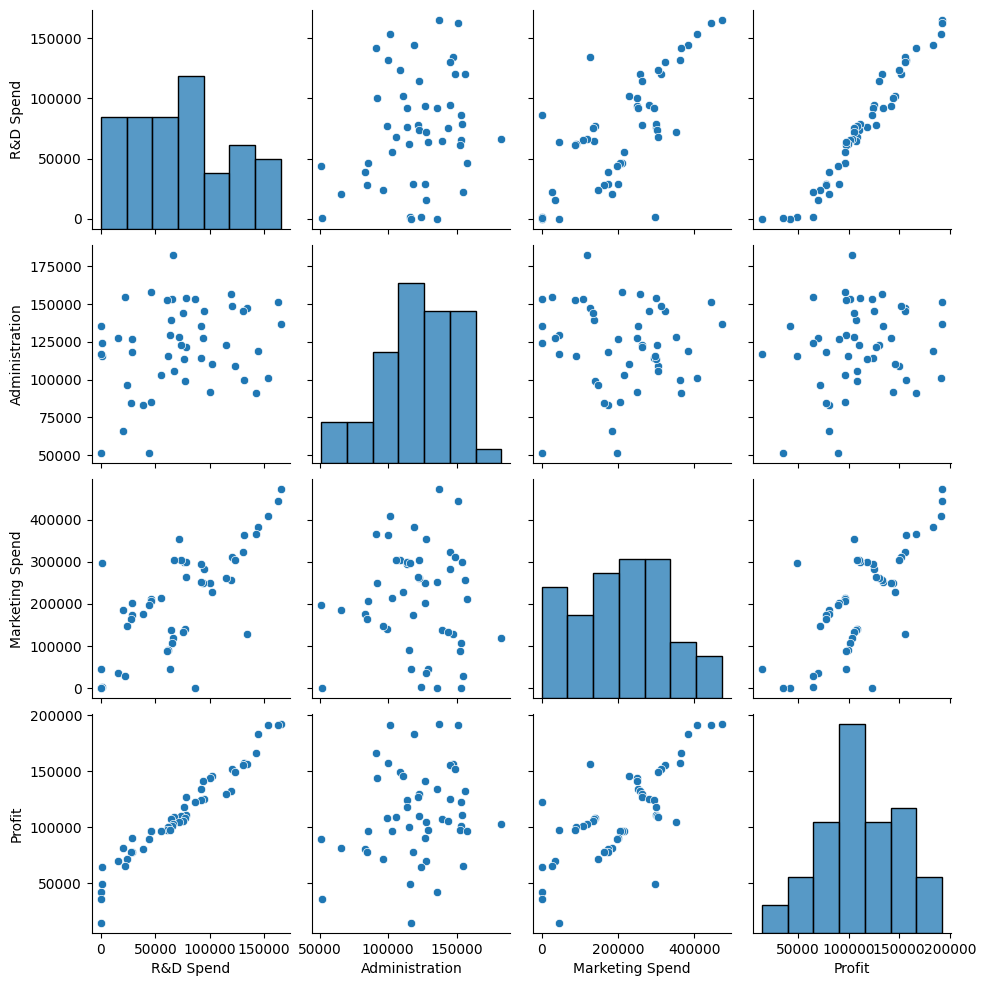

In [11]:
sns.pairplot(Start)

In [16]:
DF = Start.iloc[:,:-1]
X = pd.get_dummies(DF).values
Y = Start.iloc[:,-1].values

In [18]:
# Splitting the dataset in to Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=5, random_state=0)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(45, 6)
(5, 6)
(45,)
(5,)


In [23]:
# Fitting the MLR
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,Y_train)

LinearRegression()

In [24]:
# To find slop
LR.coef_

array([ 7.78395354e-01,  5.70695437e-03,  3.21344322e-02,  1.24850276e+02,
       -1.02835632e+03,  9.03506043e+02])

In [25]:
# Intercept
LR.intercept_

46250.73722073361

In [26]:
# Predict the test set
coef = LR.coef_.reshape(-1,1)
np.dot(X_test, coef) + LR.intercept_

array([[101475.55240111],
       [133287.417583  ],
       [132546.1614474 ],
       [ 72702.7136192 ],
       [178346.51727008]])

In [31]:
Y_pred_train = LR.predict(X_train)
Y_pred_test = LR.predict(X_test)

In [27]:
Y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39])

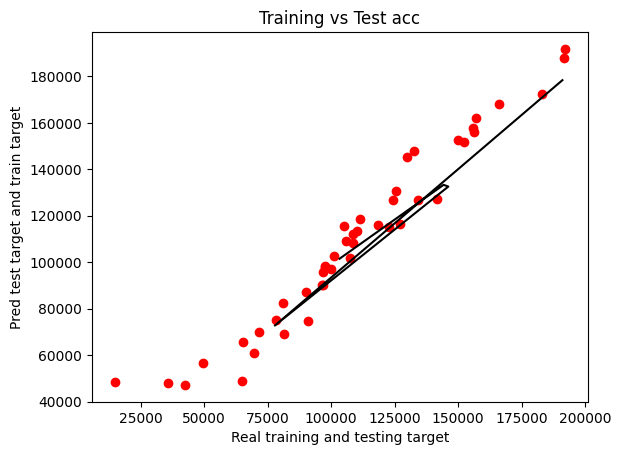

In [32]:
plt.scatter(Y_train, Y_pred_train, color='red')
plt.plot(Y_test, Y_pred_test, color='black')
plt.title('Training vs Test acc')
plt.xlabel('Real training and testing target')
plt.ylabel('Pred test target and train target')
plt.show()

In [33]:
# Model evulation
from sklearn.metrics import r2_score
print(r2_score(Y_train, Y_pred_train))
print(r2_score(Y_test, Y_pred_test))

0.94899164310162
0.9348094371060998
